# Week 2: Lasso Regression

## Learning Outcomes

+ Data cleaning
+ Exploratory data analysis
+ Feature preprocessing
+ Lasso Regression vs. Linear Regression

## 1. Importing the required libraries

In [254]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from pprint import pprint

warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Loading Dataset
The housing dataset contains information about housing prices and factors affecting them.
1. <span style="color: blue;">Question:</span> Download the data <code>data.csv</code> from Canvas and read the CSV file using the Pandas library.   


In [4]:
data = pd.read_csv("./data.csv")
pprint(data)

     MSZoning  LotFrontage  LotArea Street Alley Utilities  OverallQual  \
0          RL         65.0     8450   Pave   NaN    AllPub            7   
1          RL         80.0     9600   Pave   NaN    AllPub            6   
2          RL         68.0    11250   Pave   NaN    AllPub            7   
3          RL         60.0     9550   Pave   NaN    AllPub            7   
4          RL         84.0    14260   Pave   NaN    AllPub            8   
...       ...          ...      ...    ...   ...       ...          ...   
1455       RL         62.0     7917   Pave   NaN    AllPub            6   
1456       RL         85.0    13175   Pave   NaN    AllPub            6   
1457       RL         66.0     9042   Pave   NaN    AllPub            7   
1458       RL         68.0     9717   Pave   NaN    AllPub            5   
1459       RL         75.0     9937   Pave   NaN    AllPub            5   

      OverallCond  MasVnrArea ExterQual  ... GarageCars GarageArea GarageQual  \
0               5 

2. Let's examine the shape of the loaded dataset to understand its dimensions.

    <span style="color: blue;">Question:</span> Display the shape of the <code>house_price</code> dataset.


In [6]:
data.shape

(1460, 37)

3. Let's gather more information about the dataset, such as data types and non-null values.

    <span style="color: blue;">Question:</span> Display information about the <code>house_price</code> dataset using the <code>info()</code> function.



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1460 non-null   object 
 1   LotFrontage   1201 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   Street        1460 non-null   object 
 4   Alley         91 non-null     object 
 5   Utilities     1460 non-null   object 
 6   OverallQual   1460 non-null   int64  
 7   OverallCond   1460 non-null   int64  
 8   MasVnrArea    1452 non-null   float64
 9   ExterQual     1460 non-null   object 
 10  ExterCond     1460 non-null   object 
 11  BsmtQual      1423 non-null   object 
 12  BsmtExposure  1422 non-null   object 
 13  TotalBsmtSF   1460 non-null   int64  
 14  HeatingQC     1460 non-null   object 
 15  CentralAir    1460 non-null   object 
 16  1stFlrSF      1460 non-null   int64  
 17  2ndFlrSF      1460 non-null   int64  
 18  GrLivArea     1460 non-null 

4. Let's take a look at the initial records in the dataset to understand its structure.

    <span style="color: blue;">Question:</span> How can you display the first few records of the <code>house_price</code> dataset?



In [9]:
data.head(n=10)

,MSZoning,LotFrontage,LotArea,Street,Alley,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,...,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolQC,Fence,MiscFeature,SalePrice
0,RL,65.0,8450,Pave,NaN,AllPub,7,5,196.0,Gd,...,2,548,TA,0,61,0,NaN,NaN,NaN,208500
1,RL,80.0,9600,Pave,NaN,AllPub,6,8,0.0,TA,...,2,460,TA,298,0,0,NaN,NaN,NaN,181500
2,RL,68.0,11250,Pave,NaN,AllPub,7,5,162.0,Gd,...,2,608,TA,0,42,0,NaN,NaN,NaN,223500
3,RL,60.0,9550,Pave,NaN,AllPub,7,5,0.0,TA,...,3,642,TA,0,35,0,NaN,NaN,NaN,140000
4,RL,84.0,14260,Pave,NaN,AllPub,8,5,350.0,Gd,...,3,836,TA,192,84,0,NaN,NaN,NaN,250000
5,RL,85.0,14115,Pave,NaN,AllPub,5,5,0.0,TA,...,2,480,TA,40,30,0,NaN,MnPrv,Shed,143000
6,RL,75.0,10084,Pave,NaN,AllPub,8,5,186.0,Gd,...,2,636,TA,255,57,0,NaN,NaN,NaN,307000
7,RL,NaN,10382,Pave,NaN,AllPub,7,6,240.0,TA,...,2,484,TA,235,204,0,NaN,NaN,Shed,200000
8,RM,51.0,6120,Pave,NaN,AllPub,7,5,0.0,TA,...,2,468,Fa,90,0,0,NaN,NaN,NaN,129900
9,RL,50.0,7420,Pave,NaN,AllPub,5,6,0.0,TA,...,1,205,Gd,0,4,0,NaN,NaN,NaN,118000


## 3. Data Cleaning

1. During the Data Cleaning step, let's examine the columns with missing values in the dataset and their respective counts.

    <span style="color: blue;">Question:</span> Generate a list of columns with missing values in the <code>house_price</code> dataset, along with their respective counts, sorted in descending order.
   


In [351]:
data.isna().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageQual        81
BsmtExposure      38
BsmtQual          37
MasVnrArea         8
GarageCars         0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
MSZoning           0
GarageArea         0
BedroomAbvGr       0
WoodDeckSF         0
OpenPorchSF        0
ScreenPorch        0
KitchenAbvGr       0
GrLivArea          0
FullBath           0
BsmtFullBath       0
2ndFlrSF           0
1stFlrSF           0
CentralAir         0
HeatingQC          0
TotalBsmtSF        0
ExterCond          0
ExterQual          0
OverallCond        0
OverallQual        0
Utilities          0
Street             0
LotArea            0
SalePrice          0
dtype: int64

2. Let's drop columns with missing values exceeding a 10% threshold.

    <span style="color: blue;">Question:</span> Determine the columns in the <code>house_price</code> dataset where the percentage of missing values is greater than 10%, and return the rounded percentages of missing values for those columns


In [29]:
na_rate = data.isna().sum().apply(lambda n: 100*n/data.shape[0]).apply(lambda r: round(r, 2))
na_rate_gt10 = na_rate.where(na_rate > 10).dropna()
na_rate_gt10

LotFrontage    17.74
Alley          93.77
FireplaceQu    47.26
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

3. Drop those columns.
    
    <span style="color: blue;">Question:</span> Remove specific columns from the <code>house_price</code> dataset that have missing values exceeding the threshold



In [30]:
data2 = data.drop(columns=na_rate_gt10.keys())
data2.shape

(1460, 31)

4. We also don't require the variables with less or zero variance. Let's identify and remove those features.

    <span style="color: blue;">Question:</span> Detect and drop features from the <code>house_price</code> dataset that exhibit the lowest variance


In [76]:
numeric_vars = data2.dtypes.apply(lambda t: pd.api.types.is_numeric_dtype(t))
numeric_vars = numeric_vars[numeric_vars].keys()
variances = data2[numeric_vars].var()
min_var = variances.min()
min_var_name = variances.where(variances.eq(min_var)).dropna().keys()

data3 = data2.drop(columns=min_var_name)

5. Continuing with the Data Cleaning process, let us further address the issue of missing values in the dataset. Before that, let's check the percentage of missing values for each variable or column.

    <span style="color: blue;">Question:</span> Calculate the percentage of missing values for each column in the <code>house_price</code> dataset, round the results to two decimal places, and then display the top columns with the highest percentages of missing values?


In [84]:
data3.isna().sum().apply(lambda n: round(100*n/data3.shape[0], 2)).sort_values(ascending=False).head(n = 5)

GarageQual      5.55
BsmtExposure    2.60
BsmtQual        2.53
MasVnrArea      0.55
MSZoning        0.00
dtype: float64

6. Now, we will impute missing values in specific columns using appropriate strategies.

    <span style="color: blue;">Question:</span> Impute missing values in the <code>GarageQual</code>, <code>BsmtQual</code>, <code>BsmtExposure</code>, and <code>MasVnrArea</code> columns of the <code>house_price</code> dataset.


In [170]:
columns = ['GarageQual', 'BsmtExposure', 'BsmtQual', 'MasVnrArea']
impute_dict = data3[columns[:3]].mode().iloc[0].to_dict()
impute_dict.update(data3[columns[-1:]].mean().to_dict())

for c in columns:
    conds = data4['GarageQual'].notna()
    data4 = data3.fillna(impute_dict)

data4.isna().sum().apply(lambda n: round(100*n/data3.shape[0], 2)).sort_values(ascending=False).head(n = 5)

MSZoning       0.0
LotArea        0.0
ScreenPorch    0.0
OpenPorchSF    0.0
WoodDeckSF     0.0
dtype: float64

7. Let's perform outlier removal on selected numerical columns in the dataset.

    <span style="color: blue;">Question:</span> Iidentify and remove outliers from the <code>house_price</code> dataset.



In [167]:
try:
    numeric_vars = numeric_vars.to_list().remove(min_var_name)
except ValueError:
    pass

threshold = 3
has_outlier = (np.abs(stats.zscore(data4[numeric_vars])) < threshold).all(axis = 1)
data5 = data4.where(has_outlier).dropna()
data5.shape

(1258, 30)

## 3. Exploratory data analysis

1. Let's start the Exploratory Data Analysis by examining the cleaned dataset.

    <span style="color: blue;">Question:</span> Display the shape of the cleaned <code>house_price</code> dataset and obtain information about its columns, data types, and non-null counts
   


In [171]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 0 to 1458
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1258 non-null   object 
 1   LotArea       1258 non-null   float64
 2   Street        1258 non-null   object 
 3   Utilities     1258 non-null   object 
 4   OverallQual   1258 non-null   float64
 5   OverallCond   1258 non-null   float64
 6   MasVnrArea    1258 non-null   float64
 7   ExterQual     1258 non-null   object 
 8   ExterCond     1258 non-null   object 
 9   BsmtQual      1258 non-null   object 
 10  BsmtExposure  1258 non-null   object 
 11  TotalBsmtSF   1258 non-null   float64
 12  HeatingQC     1258 non-null   object 
 13  CentralAir    1258 non-null   object 
 14  1stFlrSF      1258 non-null   float64
 15  2ndFlrSF      1258 non-null   float64
 16  GrLivArea     1258 non-null   float64
 17  BsmtFullBath  1258 non-null   float64
 18  FullBath      1258 non-null   flo

2. Let's visually assess the correlations between variables by creating a heatmap.

    <span style="color: blue;">Question:</span> Generate a heatmap to visualize the correlation matrix among numerical variables in the cleaned <code>house_price</code> dataset.



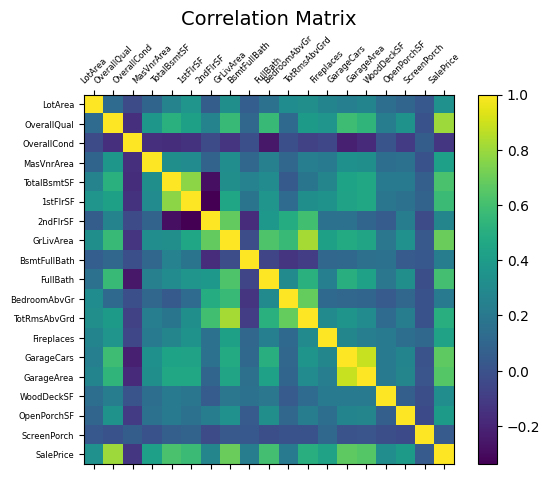

In [187]:
plt.matshow(data5.corr(numeric_only=True), fignum=0)
plt.xticks(range(data5.select_dtypes(['number']).shape[1]), data5.select_dtypes(['number']).columns, fontsize=6, rotation=45)
plt.yticks(range(data5.select_dtypes(['number']).shape[1]), data5.select_dtypes(['number']).columns, fontsize=6)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=14)
plt.xticks
plt.show()

In the above map, we observe that Quality has the highest correlation with SalePrice among the numeric variables (0.8). It rates the overall material and finish of the house on a scale from 1 (very poor) to 10 (excellent).
    
3. Let's visualize the relationship between 'Overall Quality' and 'SalePrice' using a bar plot.

    <span style="color: blue;">Question:</span> Create a bar plot comparing the median sale prices for different levels of 'Overall Quality' in the cleaned <code>house_price</code> dataset.
   


<Axes: title={'center': 'Median Sale Price by Overall Quality'}, xlabel='OverallQual'>

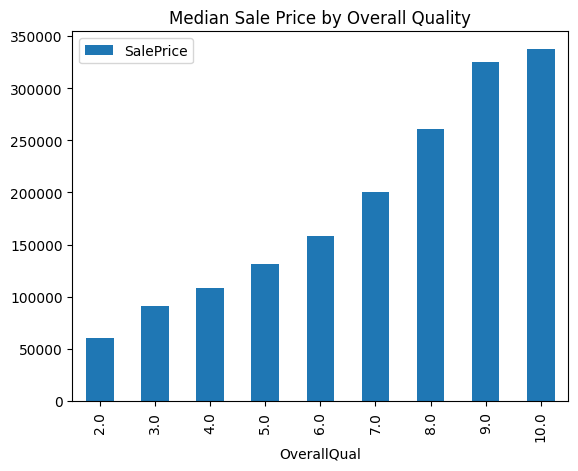

In [205]:
price_by_qual = data5.select_dtypes(['number']).groupby(by="OverallQual").median()[["SalePrice"]]
price_by_qual.plot.bar(y='SalePrice', title="Median Sale Price by Overall Quality")

5. Let's further analyze the relationship between 'SalePrice' and 'Overall Quality' using box plots.
Box plots provide a visual summary of data distribution, showing the median, quartiles, and potential outliers. Unlike bar graphs, they offer insights into data spread and skewness, enhancing the understanding of variability within each category.

    <span style="color: blue;">Question:</span> Create box plots to visually compare the distribution of 'SalePrice' across different levels of 'Overall Quality' in the cleaned <code>house_price</code> dataset.
   

SalePrice    Axes(0.125,0.11;0.775x0.77)
dtype: object

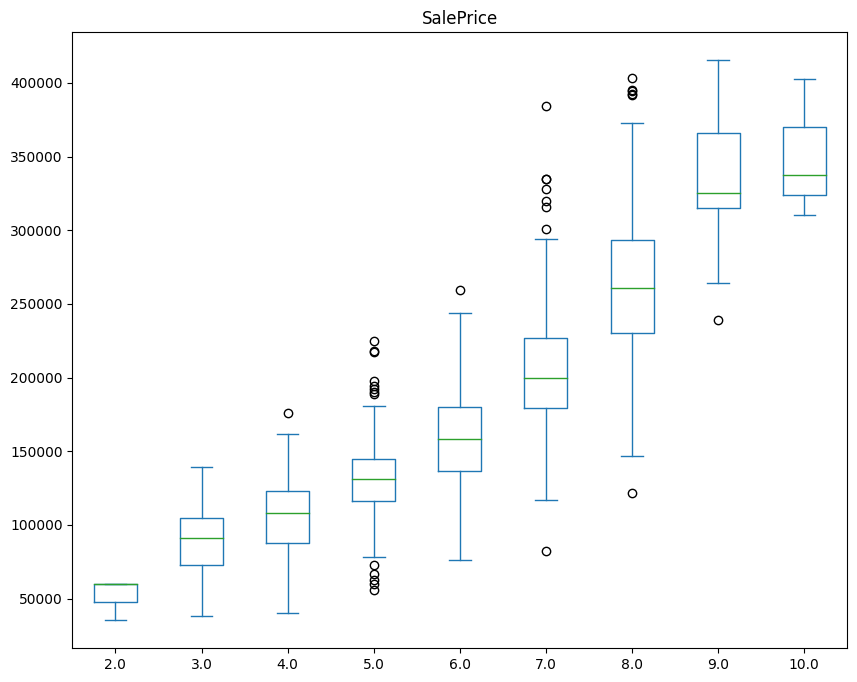

In [207]:
data5.plot.box(column="SalePrice", by="OverallQual", figsize=(10,8))

## 4. Preprocessing features

1. Let's move on to preprocessing the categorical features in the dataset.

    <span style="color: blue;">Question:</span> Display the unique values of each categorical feature in the cleaned <code>house_price</code> dataset?


In [217]:
data5_cat = data5.select_dtypes(exclude=['number'])

for c in data5_cat.columns:
    print(c, data5_cat[c].unique(), sep = ": ")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
Utilities: ['AllPub']
ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
ExterCond: ['TA' 'Gd' 'Fa']
BsmtQual: ['Gd' 'TA' 'Ex' 'Fa']
BsmtExposure: ['No' 'Gd' 'Mn' 'Av']
HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
CentralAir: ['Y' 'N']
KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
GarageQual: ['TA' 'Fa' 'Gd' 'Po' 'Ex']


2. We will now convert categorical features to real numbers for better compatibility with machine learning algorithms.

    <span style="color: blue;">Question:</span> Convert specific categorical features in the cleaned <code>house_price</code> dataset to real numbers based on predefined mappings


In [236]:
mappings = {c: {r: v for v, r in enumerate(data5_cat[c].unique().tolist())} for c in data5_cat.columns}
data6 = data5.replace(to_replace=mappings)

3. To handle categorical features without inherent order, we'll create dummy columns.

    <span style="color: blue;">Question:</span>Generate dummy columns for specific categorical features in the cleaned <code>house_price</code> dataset and join them with the original dataset
   


In [352]:
data7 = pd.get_dummies(data6, columns=data5_cat.columns, dtype=int, drop_first=True)

,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,...,HeatingQC_3,HeatingQC_4,CentralAir_1,KitchenQual_1,KitchenQual_2,KitchenQual_3,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_4
0,8450.0,7.0,5.0,196.0,856.0,856.0,854.0,1710.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,9600.0,6.0,8.0,0.0,1262.0,1262.0,0.0,1262.0,0.0,2.0,...,0,0,0,1,0,0,0,0,0,0
2,11250.0,7.0,5.0,162.0,920.0,920.0,866.0,1786.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,9550.0,7.0,5.0,0.0,756.0,961.0,756.0,1717.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,14260.0,8.0,5.0,350.0,1145.0,1145.0,1053.0,2198.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,17217.0,5.0,5.0,0.0,1140.0,1140.0,0.0,1140.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0
1454,7500.0,7.0,5.0,0.0,1221.0,1221.0,0.0,1221.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1455,7917.0,6.0,5.0,0.0,953.0,953.0,694.0,1647.0,0.0,2.0,...,0,0,0,1,0,0,0,0,0,0
1456,13175.0,6.0,6.0,119.0,1542.0,2073.0,0.0,2073.0,1.0,2.0,...,0,0,0,1,0,0,0,0,0,0


## 5. Modelling Linear Regression
1. Moving on to the modeling phase. We need to first standardize the features and the target variable as they can be of different scales.

    <span style="color: blue;">Question:</span> Perform standardization on the non-categorical features and the target variable in the <code>house_price</code> dataset using the <code>StandardScaler</code> from <code>sklearn.preprocessing</code>


In [290]:
scaler = StandardScaler()

data7 = data6.copy()

for c in numeric_vars:
    data7[c] = scaler.fit_transform(np.asarray(data7[c]).reshape(-1, 1))

data7

,MSZoning,LotArea,Street,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice
0,0,-0.247908,0,0,0.776889,-0.553348,0.871752,0,0,0,...,0,1.165469,-0.916329,0.381798,0.453619,0,-0.794586,0.396747,-0.207231,0.598913
1,0,0.040213,0,0,-0.000618,2.400448,-0.622778,1,0,0,...,1,-0.232871,0.749483,0.381798,0.009629,0,1.939641,-0.757106,-0.207231,0.172805
2,0,0.453604,0,0,0.776889,-0.553348,0.612497,0,0,0,...,0,-0.232871,0.749483,0.381798,0.756340,0,-0.794586,0.037350,-0.207231,0.835640
3,0,0.027686,0,0,0.776889,-0.553348,-0.622778,1,0,1,...,0,0.466299,0.749483,1.769954,0.927881,0,-0.794586,-0.095059,-0.207231,-0.482138
4,0,1.207730,0,0,1.554396,-0.553348,2.046026,0,0,0,...,0,1.864639,0.749483,1.769954,1.906677,0,0.967063,0.831806,-0.207231,1.253856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0,1.948578,0,0,-0.778125,-0.553348,-0.622778,1,0,0,...,1,-0.232871,-0.916329,-2.394513,-2.311227,0,-0.464277,0.302169,-0.207231,-1.358027
1454,3,-0.485922,0,0,0.776889,-0.553348,-0.622778,0,0,0,...,0,-0.232871,-0.916329,0.381798,-0.293091,0,-0.794586,1.380358,-0.207231,0.228041
1455,0,-0.381446,0,0,-0.000618,-0.553348,-0.622778,1,0,0,...,1,0.466299,0.749483,0.381798,0.009629,0,-0.794586,-0.000481,-0.207231,0.070224
1456,0,0.935894,0,0,-0.000618,0.431251,0.284615,1,0,0,...,1,0.466299,2.415295,0.381798,0.211443,0,2.407579,-0.757106,-0.207231,0.622586


2. Next, we'll split the dataset into feature and target variables.

    <span style="color: blue;">Question:</span> Separate the target variable ('SalePrice') from the <code>house_price</code> dataset and assign it to <code>y</code>. Assign the rest to <code>X</code>

In [295]:
X = data7.drop(columns="SalePrice")
y = data7.filter(regex="SalePrice")

3. Let's proceed by building a Linear Regression model to predict house prices.

    <span style="color: blue;">Question:</span> Construct a linear regression model to predict house prices. Print p values.
   



In [312]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

fm = LinearRegression().fit(X, y)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
est.pvalues

const           5.192966e-01
MSZoning        5.498687e-01
LotArea         1.111034e-12
Street          3.144583e-01
Utilities       1.575790e-01
OverallQual     6.286850e-69
OverallCond     7.338878e-06
MasVnrArea      2.965700e-03
ExterQual       2.566625e-01
ExterCond       1.439750e-02
BsmtQual        5.575203e-04
BsmtExposure    2.652436e-02
TotalBsmtSF     7.638399e-15
HeatingQC       1.867850e-10
CentralAir      1.082561e-01
1stFlrSF        3.082254e-03
2ndFlrSF        1.629555e-03
GrLivArea       4.406562e-01
BsmtFullBath    1.345562e-16
FullBath        6.214915e-05
BedroomAbvGr    4.662632e-05
KitchenQual     4.443046e-04
TotRmsAbvGrd    7.282654e-01
Fireplaces      2.310270e-02
GarageCars      4.202994e-03
GarageArea      3.185995e-03
GarageQual      1.544205e-02
WoodDeckSF      6.803567e-06
OpenPorchSF     3.580311e-05
ScreenPorch     2.792493e-01
dtype: float64

4. Let's visualize the learned parameters from the model.

    <span style="color: blue;">Question:</span> Create a bar plot to visualize the learned parameters from the regression model? Examine what does this plot reveal about the impact of different features on the predicted house prices?


More importantly, the p-values of regression coefficients are used to determine whether there is a statistically significant relationship between each predictor variable and the response variable 

A low p-value (less than some significance level, such as 0.1 or 0.05) indicates that we can reject the null hypothesis and conclude that there is a statistically significant relationship between the predictor variable and the response variable.

4. Let's display the p-values associated with the coefficients of the variables used in the linear regression.

    <span style="color: blue;">Question:</span> Print the p-values associated with the co-efficient estimates of the linear regression model


In [313]:
print(est.pvalues)

const           5.192966e-01
MSZoning        5.498687e-01
LotArea         1.111034e-12
Street          3.144583e-01
Utilities       1.575790e-01
OverallQual     6.286850e-69
OverallCond     7.338878e-06
MasVnrArea      2.965700e-03
ExterQual       2.566625e-01
ExterCond       1.439750e-02
BsmtQual        5.575203e-04
BsmtExposure    2.652436e-02
TotalBsmtSF     7.638399e-15
HeatingQC       1.867850e-10
CentralAir      1.082561e-01
1stFlrSF        3.082254e-03
2ndFlrSF        1.629555e-03
GrLivArea       4.406562e-01
BsmtFullBath    1.345562e-16
FullBath        6.214915e-05
BedroomAbvGr    4.662632e-05
KitchenQual     4.443046e-04
TotRmsAbvGrd    7.282654e-01
Fireplaces      2.310270e-02
GarageCars      4.202994e-03
GarageArea      3.185995e-03
GarageQual      1.544205e-02
WoodDeckSF      6.803567e-06
OpenPorchSF     3.580311e-05
ScreenPorch     2.792493e-01
dtype: float64


It can be seen seen that majority of these variables have significant (i.e., p-values are less than 0.1) impact on the sales. Hence, linear regression is not that useful in this context.


1. In the next step, we will build a Lasso regression model that predict house prices, while performing feature selection.

    <span style="color: blue;">Question:</span> Create and train this Lasso regression mode.


In [353]:
from sklearn.linear_model import Lasso

las = Lasso(alpha=0.01)
las.fit(X, y)

Lasso(alpha=0.01)

2. With the trained Lasso regression model, let's obtain the fitted values for the training data.

    <span style="color: blue;">Question:</span> Use the <code>predict()</code> function to generate the fitted values for the training data


In [354]:
y1 = las.predict(X)

array([ 0.55404762,  0.21429217,  0.78109003, ...,  0.0542226 ,
        0.93731619, -0.4608372 ])

3. Let's evaluate the performance of the Lasso regression model using the R-squared metric.

    <span style="color: blue;">Question:</span> Use the <code>rsquared</code> function.


In [355]:
las.score(X, y)

0.8469713773876559

4. Let's inspect the learned coefficients (weights) and the intercept (bias) of the Lasso regression model.

    <span style="color: blue;">Question:</span> Retrieve the coefficients of the features along with the intercept for the Lasso regression model.


    <span style="color: purple;">Explanation:</span> Lasso regression is known for its feature selection capability, where it can drive certain feature coefficients to exactly zero. This is particularly useful when dealing with datasets with many features, as irrelevant features can be effectively eliminated from the model. The coefficients provide insights into how much each feature contributes to the prediction, and the ability to make some coefficients zero helps in simplifying the model and avoiding overfitting.


5. Let's visualize the learned parameters from the Lasso regression model.

    <span style="color: blue;">Question:</span> Create a bar plot to visually represent the learned parameters from the Lasso regression model. What insights can you gather from this visualization regarding the impact of different features on the predicted house prices?
   
    


Some variables such as 'MSZoning RH', 'MSZoning RL', and 'MSZoning FV' have zero parameter values. 

6. Let's create a histogram to compare the true and predicted values of the target variable from the Lasso regression model.

    <span style="color: blue;">Question:</span> Use the <code>plt.hist()</code> function to create a histogram that visually compares the distribution of true and predicted values of the target variable (<code>y</code>) from the Lasso regression model.


7. To better understand the benefits of Lasso regression over linear regression, consider an iterative process of adding features.

    <span style="color: blue;">Question:</span> Iteratively add features to observe the impact of Lasso regression compared to linear regression


<span style="color: purple;">At the end of this iterative process,</span> we observe that after a certain point, there is no significant improvement in the R-squared value for the linear regression model. 

Some variables such as 'MSZoning RH', 'MSZoning RL', and 'MSZoning FV' have zero parameter values. 
This behavior highlights the power of Lasso regression in feature selection, where it effectively removes certain features from the model by driving their coefficients to zero. As a result, Lasso helps in simplifying the model and enhancing its interpretability while maintaining competitive predictive performance.
